# GDA on data generated using BM Transformation

In [1]:
from numpy import random, sqrt, log, sin, cos, pi
from pylab import show,hist,subplot,figure
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### BM transformation

In [2]:
def gaussian(u1,u2):
    z1 = sqrt(-2*log(u1))*cos(2*pi*u2)
    z2 = sqrt(-2*log(u1))*sin(2*pi*u2)
    return z1,z2

### Split the data

In [3]:
def train_test_split(data, split = 0.7):
    data = data.reset_index(drop = True)
    idx = int(split*len(data))
    train_data, test_data = data.iloc[:idx], data.iloc[idx:]
    train_x, train_y = train_data.iloc[:,:2], train_data.iloc[:,-1:]
    test_x, test_y = test_data.iloc[:,:2], test_data.iloc[:,-1:]
    return train_x, train_y, test_x, test_y 

In [4]:
def feat_class(data):
    x, y = data.iloc[:,:2], data.iloc[:,-1:]
    return x, y

Below is the class which has defined training and testing functions as discussed in the attached pdf.

In [5]:
class GDA():
    def __init__(self):
        self.u0 = None
        self.u1 = None
        self.sig = None
        self.phi = None

    def train(self, x, y):
        self.u0 = np.mean(x[y['label'] == 0])
        self.u1 = np.mean(x[y['label'] == 1])
        self.phi = np.mean(y)

        t = x[y['label'] == 1] - self.u1
        # print(t.shape)
        f = x[y['label'] == 0] - self.u0
        tmp = (t.T.dot(t) + f.T.dot(f))
        # print(x.shape[0])
        self.sig = tmp/x.shape[0]
        return

    def test(self, x, y):
        n = x.shape[1]
        pi = 3.14
        det_sig = np.linalg.det(self.sig)
        inv_sig = np.linalg.inv(self.sig)
        # print(x)
        preds = []
        for _, row in x.iterrows():
            # print(row)
            tmp0 = row - self.u0
            tmp1 = row - self.u1
            
            # print(tmp0.shape)
            # print(inv_sig.shape)

            z0 = np.exp(0.5 * (np.dot(np.dot(tmp0.T, inv_sig), tmp0)))
            z1 = np.exp(0.5 * (np.dot(np.dot(tmp1, inv_sig), tmp1)))
            # print(z0, z1)

            px_py_0 = 1.0/((sqrt(pow((2*pi), n))*sqrt(det_sig)) * z0)
            px_py_1 = 1.0/((sqrt(pow((2*pi), n))*sqrt(det_sig)) * z1)

            # print(px_py_0, px_py_1)
            p_t = self.phi['label']
            # print(p_t)

            py_px_0 = px_py_0 * (1 - p_t)
            py_px_1 = px_py_1 * p_t

            if py_px_0 > py_px_1 :
                 preds.append(0)
            else:
                preds.append(1)
 
        return preds

Create data using BM transformation

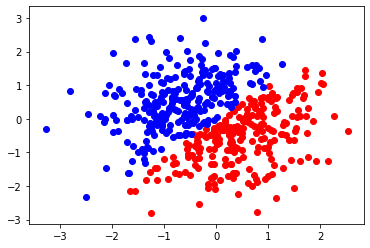

In [6]:

u1 = random.rand(500)
u2 = random.rand(500)
z1, z2 = gaussian(u1, u2)
c1 = []
for i in range(500):
    if(z1[i] > z2[i]):
        c1.append(1)
    else:
        c1.append(0)
# c1 = np.random.choice([0, 1], size=500, p=[.5, .5])


train_data = {'x1':z1, 'x2':z2, 'label':c1}
train_data = pd.DataFrame(data = train_data)

train_x, train_y = feat_class(train_data)


pos_data = train_data[train_data.iloc[:,-1]==1]
neg_data = train_data[train_data.iloc[:,-1]==0]
plt.scatter(pos_data.iloc[:,0], pos_data.iloc[:,1], color="red")
plt.scatter(neg_data.iloc[:,0], neg_data.iloc[:,1], color="blue")
plt.show()

test_x, test_y = train_x[:200], train_y[:200]


Train the model over the data and test it on the Testing set

In [7]:

model = GDA()
model.train(train_x, train_y)



preds = model.test(train_x, train_y)
preds = np.array(preds)
train_y = train_y['label'].to_numpy()

# print(preds)
# print(test_y)

count_wrong = lambda test_y,yy: sum([a != b for a,b in zip(train_y, yy)])
num_errs = count_wrong(preds, train_y)
total = len(train_y)

print("\nNumber of errors = {} out of {}".format(num_errs, total))
print('Accuracy on Trained data {:.4f}, Errors: {} out of {}'.format(1 - num_errs/total, num_errs, total))



preds = model.test(test_x, test_y)
preds = np.array(preds)
test_y = test_y['label'].to_numpy()

# print(preds)
# print(test_y)

count_wrong = lambda test_y,yy: sum([a != b for a,b in zip(test_y, yy)])
num_errs = count_wrong(preds, test_y)
total = len(test_y)

print("\nNumber of errors = {} out of {}".format(num_errs, total))
print('Accuracy on new Test Data {:.4f}, Errors: {} out of {}'.format(1 - num_errs/total, num_errs, total))



Number of errors = 0 out of 500
Accuracy on Trained data 1.0000, Errors: 0 out of 500

Number of errors = 5 out of 200
Accuracy on new Test Data 0.9750, Errors: 5 out of 200
